<a href="https://colab.research.google.com/github/ch00226855/CMP414765Fall2022/blob/main/Week08_ImageClassification_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 8
# Image Classification with K-Nearest-Neighbor and Support Vector Machine
- Learn about the MNIST hand-written digit data
- Visualize and analyze the dataset
- Apply SVM and kNN model to build a classifier
- Evaluate the performance of the models

*Readings: Textbook, Chapter 3*

# I. The MNIST Data

The **MNIST database** is a large database of handwritten digits that is commonly used for training various image processing systems. The images were collected from digits written by high school students and employees of the United States Census Bureau. The database has a training set of 60,000 examples, and a test set of 10,000 examples.

The original dataset is in a format that is difficult for beginners to use. The data is transformed to CSV format on [Kaggle](https://www.kaggle.com/oddrationale/mnist-in-csv).
- Log in to Kaggle.com
- Click "Download" to download the data as a `.zip` file
- Extract `mnist_train.csv` and `mnist_test.csv` from the `zip` file
- Upload `mnist_train.csv` to Google Colab

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/330px-MnistExamples.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the training set and show its first 5 rows.
filename = "mnist_train.csv"
raw_data = pd.read_csv(filename)
print(raw_data.shape)
raw_data.head() # 28*28 = 784

(60000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## II. Data Exploration
- Show basic information about the dataset:
    - size, column names, data types
    - class frequencies for each categorical feature
    - max, min, mean for each numerical feature
    - correlation between the class feature and each input feature
- Visualize a data example as an image.

In [ ]:
# Shape, column names, and data types

print("Shape:", raw_data.shape)

print("Column names:", raw_data.columns)

print("Data types:", raw_data.dtypes)

Shape: (60000, 785)
Column names: Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)
Data types: label    int64
1x1      int64
1x2      int64
1x3      int64
1x4      int64
         ...  
28x24    int64
28x25    int64
28x26    int64
28x27    int64
28x28    int64
Length: 785, dtype: object


In [ ]:
# class frequencies for each categorical feature

raw_data['label'].value_counts().sort_index()

0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: label, dtype: int64

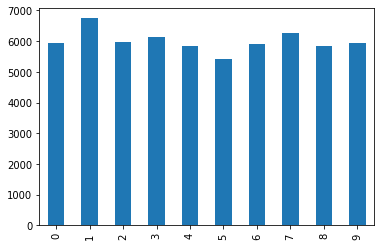

In [ ]:
# Plot a bar chart with DataFrame.plot.bar() to visualize class frequencies

raw_data['label'].value_counts().sort_index().plot.bar()

Label: 0


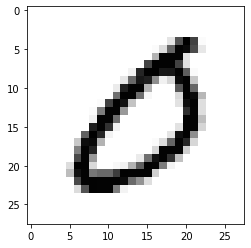

In [ ]:
# Visualize data as images

# Extract one image
ind = 4321
input_features = [x for x in raw_data.columns if x != "label"]
data_example = raw_data.loc[ind, input_features]
# print(data_example.shape)

# Convert the data example to a numpy array
data_example_array = data_example.values
# print(data_example_array.shape)

# Transform the array to a 28*28 2D array
data_example_array_transformed = data_example_array.reshape([28, 28])
np.set_printoptions(linewidth=150)
# print(data_example_array_transformed)

# Display the array as an image
print("Label:", raw_data.loc[ind, 'label'])
plt.imshow(data_example_array_transformed, cmap="Greys")

In [3]:
# Write a function to automate the image display process
def get_image(data, ind):

    input_features = [x for x in data.columns if x != "label"]
    data_example = data.loc[ind, input_features]
    data_example_array = data_example.values
    data_example_array_transformed = data_example_array.reshape([28, 28])
    print("Label:", data.loc[ind, 'label'])
    plt.imshow(data_example_array_transformed, cmap="Greys")

Label: 2


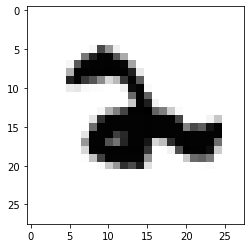

In [ ]:
# This statement should display an image from the data set.
ind = 2234
get_image(raw_data, ind)

## III. Build Classifiers
- Logistic Regression
- The k-Nearest-Neighbor (kNN) Method
- The linear support vector machine (linear SVM) method

In [6]:
# Build a Logistic Regression classifer
input_features = [x for x in raw_data.columns if x != "label"]

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(raw_data[input_features], raw_data['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [7]:
# Upload 'mnist_test.csv', split the data into validation_data (50%) and test_data (50%)

test_data = pd.read_csv("mnist_test.csv")
print(test_data.shape)
test_data.head()

from sklearn.model_selection import train_test_split
validation_data, test_data = train_test_split(test_data, test_size=0.5)
print(validation_data.shape)
print(test_data.shape)

(10000, 785)
(5000, 785)
(5000, 785)


In [8]:
# Measure the model's performance on validation_data

from sklearn.metrics import accuracy_score
predictions = model_lr.predict(validation_data[input_features])
accuracy = accuracy_score(validation_data['label'], predictions)
print(accuracy)

0.923


In [ ]:
# Let's fine-tune the model
# What if the model is trained with more iterations?
model_lr2 = LogisticRegression(max_iter=500)
model_lr2.fit(raw_data[input_features], raw_data['label'])
predictions = model_lr2.predict(validation_data[input_features])
accuracy = accuracy_score(validation_data['label'], predictions)
print(accuracy)

0.9236


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# What if the model is trained using a different training algorithm?
model_lr3 = LogisticRegression(solver='sag')
model_lr3.fit(raw_data[input_features], raw_data['label'])
predictions = model_lr3.predict(validation_data[input_features])
accuracy = accuracy_score(validation_data['label'], predictions)
print(accuracy)
# This solver takes too long to complete.

KeyboardInterrupt: ignored

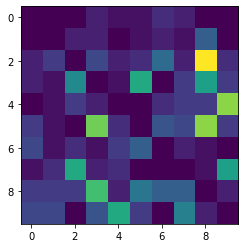

In [9]:
# Show the confusion matrix of the model.
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(validation_data['label'], model_lr.predict(validation_data[input_features]))
# print(matrix)


for i in range(matrix.shape[0]): # remove diagonal elements
    matrix[i, i] = 0
plt.imshow(matrix)

### Linear SVM

![Illustration of SVM](https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png)

- The **linear SVM** classifier replies on lines/planes/hyperplanes to separate data points from different classes.
- The decision boundary is chosen so that its distance with the closest data points is maximized.
- Chapter 5 explains this method in detail.

In [10]:
# Train a linear SVM classifier
# The training takes longer time than logistic regression
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(raw_data[input_features], raw_data['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [11]:
# Measure this model's performance on the validation set.
from sklearn.metrics import precision_score, recall_score
def model_performance(model, data):
    """
    Display key performance measures on a given model.

    Parameters:
    model: a model trained on the MNIST data.
    data: test data set.
    """
    input_features = [x for x in data.columns if x != 'label']
    predictions = model.predict(data[input_features])
    
    accuracy = accuracy_score(data['label'], predictions)
    print("Accuracy:", accuracy)

    matrix = confusion_matrix(data['label'], predictions)
    print(matrix)

    precisions = precision_score(data['label'], predictions, average=None)
    print("Precisions:", precisions)

    recalls = recall_score(data['label'], predictions, average=None)
    print("Recalls:", recalls)

In [12]:
model_performance(model_svm, validation_data)

Accuracy: 0.8614
[[485   0   3   4   0   4   5   3   4   1]
 [  0 555   2   1   0   2   2   1   0   0]
 [  5  18 368  50   9   5   4  10  22   6]
 [  1   0   5 458   0  19   3  22   9  10]
 [  0   1   3   2 438   0   4   7   7  29]
 [  1   2   1  17   5 363   3  14  16  10]
 [  7   2   6   2   9  22 446   0   2   1]
 [  1   4   8   2   1   0   1 476   1  18]
 [  4  25   2  33   6  49   4  22 294  31]
 [  2   4   1   6  13   4   0  41   7 424]]
Precisions: [0.95849802 0.90834697 0.92230576 0.79652174 0.91060291 0.77564103
 0.94491525 0.79865772 0.8121547  0.8       ]
Recalls: [0.95284872 0.98579041 0.74044266 0.86907021 0.89205703 0.84027778
 0.89738431 0.9296875  0.62553191 0.84462151]


In [13]:
model_performance(model_lr, validation_data)

Accuracy: 0.923
[[500   0   0   2   1   1   3   2   0   0]
 [  0 548   2   2   0   1   2   1   7   0]
 [  2   4 445   5   2   3   8   2  23   3]
 [  2   1  11 477   1  14   0   4  13   4]
 [  0   1   4   2 454   0   3   4   4  19]
 [  4   1   0  18   3 372   6   5  19   4]
 [  5   1   3   1   4   7 473   2   1   0]
 [  1   3  14   2   3   0   0 475   1  13]
 [  4   4   4  16   2   9   7   7 415   2]
 [  5   5   0   6  14   4   0  10   2 456]]
Precisions: [0.95602294 0.96478873 0.92132505 0.89830508 0.93801653 0.90510949
 0.94223108 0.92773438 0.8556701  0.91017964]
Recalls: [0.98231827 0.97335702 0.89537223 0.90512334 0.92464358 0.86111111
 0.95171026 0.92773438 0.88297872 0.90836653]


### KNN Method

- This is a *non-parametric* machine learning model.
- For each input $x$, the model finds the k known data examples that are most similar to $x$ (nearest neighbors).
- The majority label from the k examples is the model's prediction on $x$.
- This method is slow when the training set is large, as searching for nearest neighbors take a lot of time.

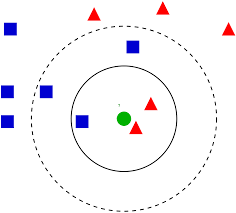



In [14]:
# Create a smaller training set to reduce training time
sample_size = 6000
samples = np.random.choice(raw_data.index, sample_size, replace=False)
mnist_train_small = raw_data.loc[samples]
print(mnist_train_small.shape)
mnist_train_small.head()

(6000, 785)


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
52251,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34287,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10715,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45052,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58634,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Train a kNN model with k=3
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(mnist_train_small[input_features], mnist_train_small['label'])

KNeighborsClassifier(n_neighbors=3)

In [18]:
# Measure this model's performance on the validation set.
model_performance(model_knn, validation_data)

Accuracy: 0.9382
[[500   1   1   0   0   2   4   1   0   0]
 [  0 560   1   1   0   0   1   0   0   0]
 [ 11  10 456   4   0   1   4   6   5   0]
 [  3   4   4 488   0  14   1   6   3   4]
 [  0   9   0   0 446   0   5   0   1  30]
 [  4   1   0   8   0 407   8   1   1   2]
 [  6   2   1   0   3   0 485   0   0   0]
 [  1  20   4   0   2   0   0 478   0   7]
 [  9   4   6  13   7  12   1   7 405   6]
 [  4   2   1   3   8   3   0  14   1 466]]
Precisions: [0.92936803 0.91353997 0.96202532 0.94390716 0.95708155 0.92710706
 0.95284872 0.93177388 0.97355769 0.90485437]
Recalls: [0.98231827 0.9946714  0.91750503 0.9259962  0.90835031 0.94212963
 0.97585513 0.93359375 0.86170213 0.92828685]


In [ ]:
# Improve the model's performance by adjusting the value of k
accuracies = []
for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(mnist_train_small[input_features], mnist_train_small['label'])
    predictions = model.predict(validation_data[input_features])
    accuracy = accuracy_score(validation_data['label'], predictions)
    accuracies.append(accuracy)
print(accuracies)

[0.9356, 0.9256, 0.9402, 0.9398, 0.9412, 0.9378, 0.939, 0.9372, 0.9342, 0.9336]


<BarContainer object of 10 artists>

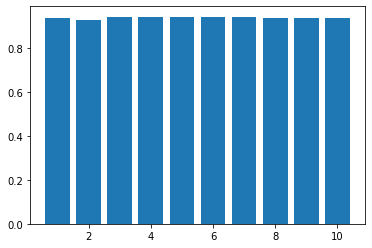

In [ ]:
plt.bar(range(1, 11), accuracies)

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_knn, mnist_train_small[input_features], mnist_train_small['label'], cv=5)
print(scores)

[0.93083333 0.9225     0.94       0.92833333 0.94      ]


## IV: Finalize the Model
- Pick the most promising model
- Evaluate the model's performance on the test set.
- Summarize this project

In [20]:
# We pick kNN with k=3 as the best model
# 1. Higher accuracy
# 2. Smaller numbers in the confusion matrix
# 3. The highest precision and recall are higher than other models
# 4. The lowest precision and recall are higher than other models.

model_performance(model_knn, test_data)

Accuracy: 0.945
[[467   1   0   0   0   1   2   0   0   0]
 [  0 569   1   0   1   0   1   0   0   0]
 [ 11  20 490   2   0   0   2  10   0   0]
 [  1   3   3 457   0   9   0   3   4   3]
 [  1  10   0   0 459   0   4   0   0  17]
 [  3   3   0  11   5 426   7   0   0   5]
 [  5   1   1   0   1   4 449   0   0   0]
 [  0  14   2   0   1   1   0 491   0   7]
 [  4   3  10   9   4  12   2   4 447   9]
 [  3   3   2   4   8   2   0  15   0 470]]
Precisions: [0.94343434 0.90749601 0.96267191 0.94616977 0.95824635 0.93626374
 0.9614561  0.93881453 0.99113082 0.91976517]
Recalls: [0.99150743 0.99475524 0.91588785 0.94616977 0.93482688 0.92608696
 0.97396963 0.95155039 0.88690476 0.9270217 ]


In [ ]:
# Conclusion:
# This is a very strong model because it has
# 1. high accuracy
# 2. small number of mistakes in each category
# 3. good precision and recall for all classes

# But it is not good enough for serious uses